In [1]:
import os
current_folder = os.path.basename(os.getcwd())
if current_folder == "PrdMAgent":
    os.chdir('..')

print(os.getcwd())

c:\Users\quoch\OneDrive\IRP\PrdM Model\AIAgent


In [2]:
from PrdMAgent.Libraries import *

In [3]:
hydraulic_df = pd.read_parquet('Data/Silver/hydraulic_df.parquet', engine='pyarrow')
benchmark_df = pd.read_parquet('Data/Silver/benchmark_df.parquet', engine='pyarrow')

## Data Analysis

In [4]:
hydraulic_df.describe()

,CE,CP,EPS1,FS1,FS2,PS1,PS2,PS3,PS4,PS5,PS6,SE,TS1,TS2,TS3,TS4,VS1,Cooler_condition,Valve_condition,Internal_pump_leakage,Hydraulic_accumulator,Stable_flag
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,31.299077,1.808399,2495.509203,6.198549,9.649453,160.485315,109.379906,1.753227,2.600266,9.163320,9.079363,55.287900,45.424567,50.365979,47.662121,40.735654,0.613315,41.240816,90.693878,0.669388,107.199546,0.342857
std,11.575330,0.278263,73.836682,1.032883,0.449246,4.699425,4.986585,0.251902,4.279355,0.576296,0.549589,8.960189,7.991933,7.396254,7.451888,8.107878,0.060260,42.383143,10.681802,0.817233,16.435848,0.474772
min,17.555983,1.062150,2361.747267,2.018572,8.857513,155.391547,104.406307,0.840252,0.000000,8.365801,8.321527,18.276617,35.313783,40.859400,38.245733,30.390800,0.524367,3.000000,73.000000,0.000000,90.000000,0.000000
25%,20.084650,1.550100,2442.933467,6.391670,9.203397,158.100195,106.962382,1.729733,0.000000,8.547239,8.487167,56.270183,36.237150,41.864183,39.123183,31.272567,0.555100,3.000000,80.000000,0.000000,90.000000,0.000000
50%,27.392533,1.739683,2480.926633,6.576673,9.692270,158.960895,107.730169,1.779631,0.000000,9.115781,9.031516,58.758150,44.836650,49.780583,47.070250,40.429050,0.610183,20.000000,100.000000,0.000000,100.000000,0.000000
75%,46.677383,2.148483,2548.211467,6.657508,10.155008,161.000735,109.421612,1.932047,3.503266,9.844351,9.729276,59.656900,54.104317,58.584467,55.694433,49.409500,0.649850,100.000000,100.000000,1.000000,130.000000,1.000000
max,47.903667,2.840100,2740.641000,6.722707,10.403098,180.922708,131.589089,2.023398,10.207068,9.978511,9.856591,60.755300,57.899283,61.958467,59.423167,53.060417,0.839067,100.000000,100.000000,2.000000,130.000000,1.000000


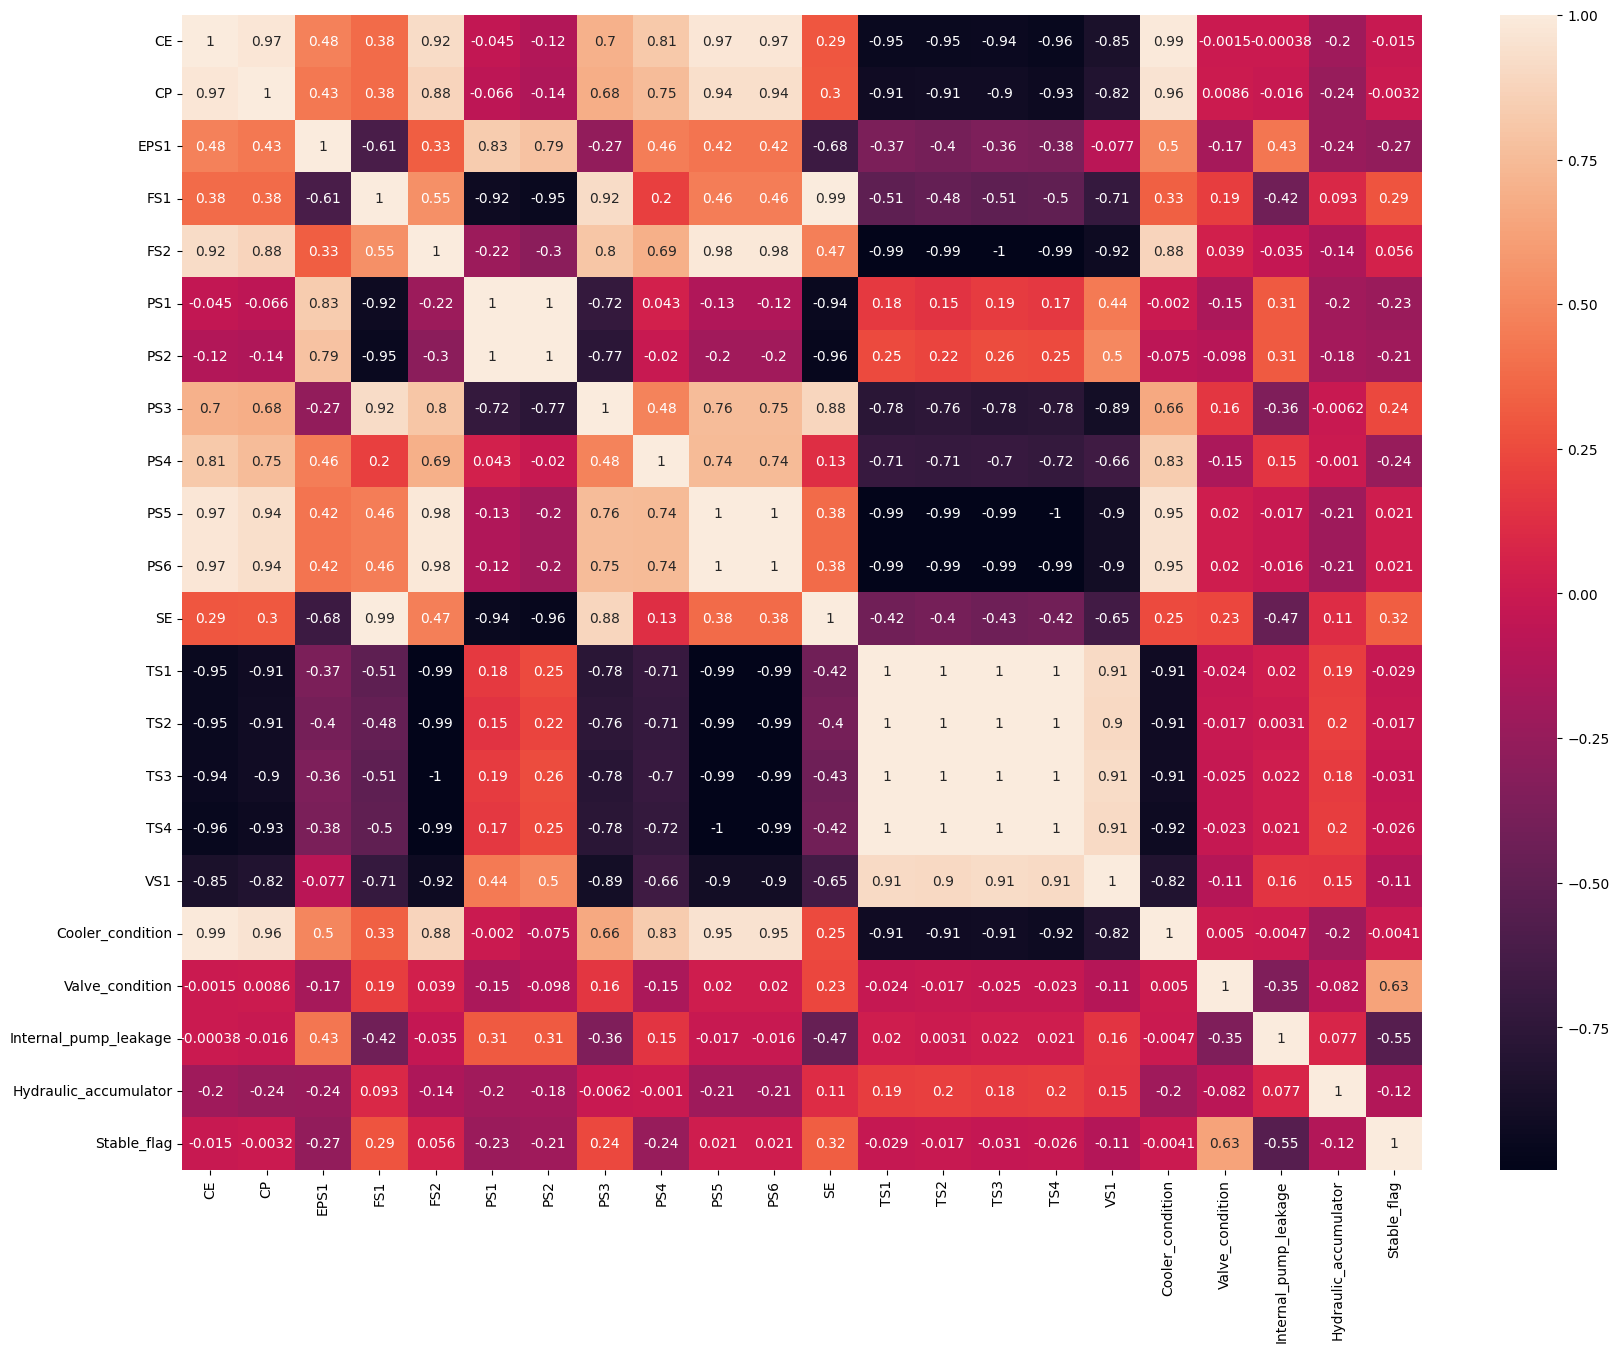

In [5]:
# Plot the correlation heatmap between feature and failure target
plt.figure(figsize=(20,15))
sns.heatmap(hydraulic_df.corr(), annot=True)
plt.show()

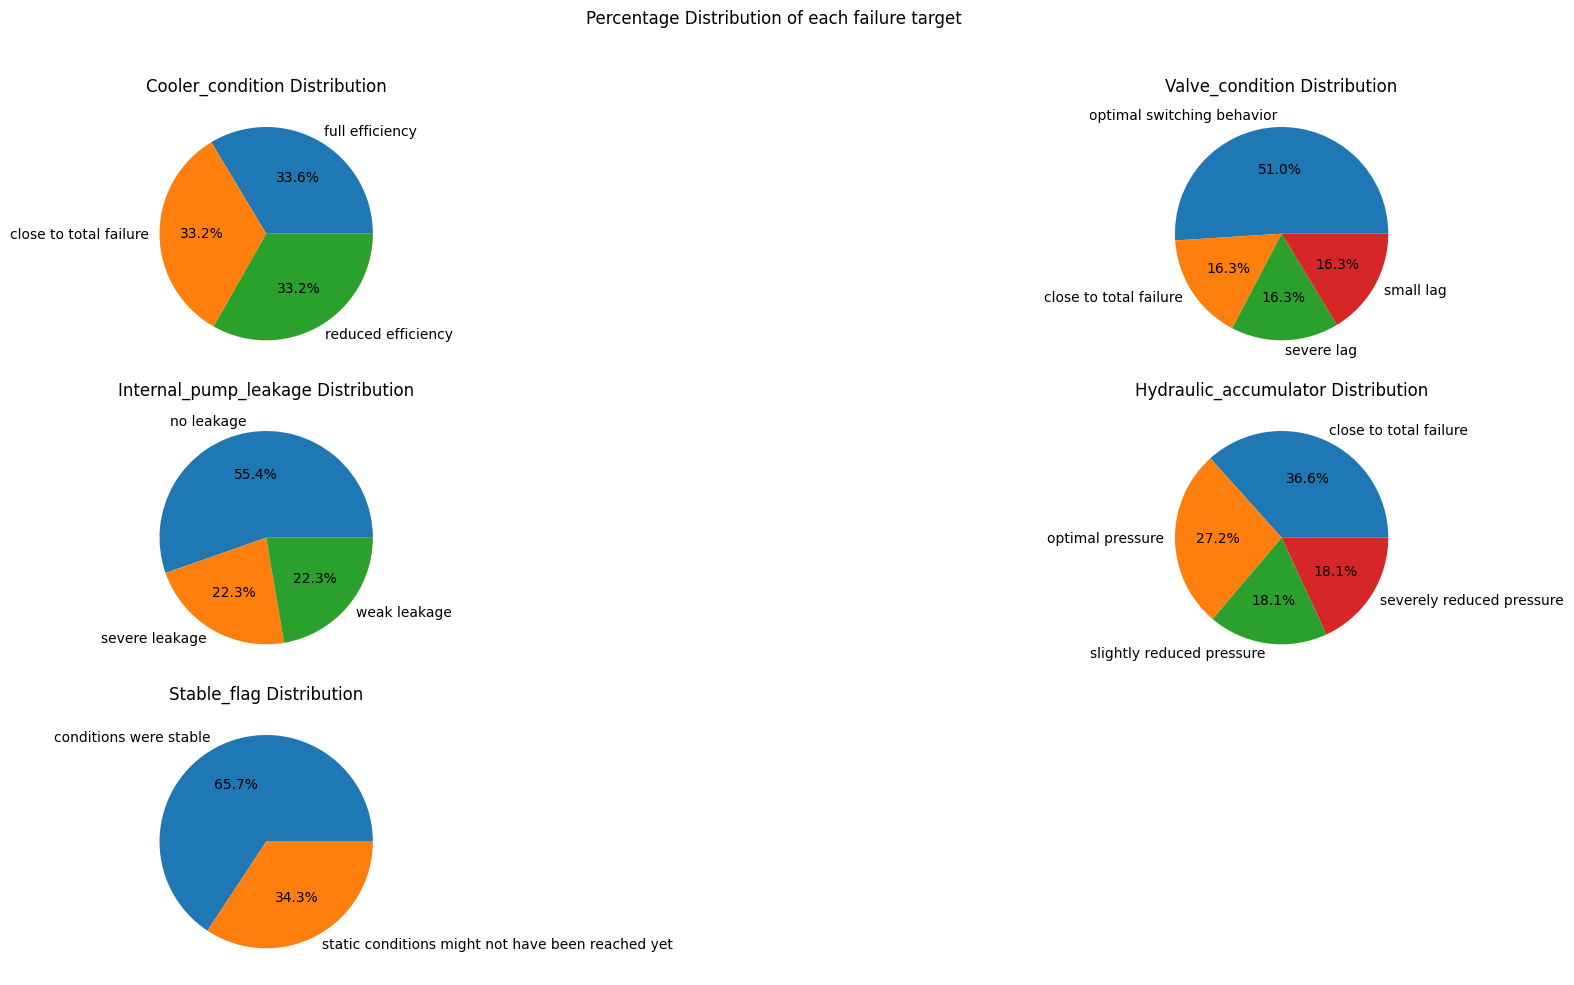

In [6]:
target_columns = ['Cooler_condition', 'Valve_condition', 'Internal_pump_leakage', 'Hydraulic_accumulator', 'Stable_flag']

fig, axes = plt.subplots(3,2, figsize=(20,10))
axes = axes.flatten()

for i, col in enumerate(target_columns):
    value_counts = hydraulic_df[col].value_counts(normalize=True) * 100 
    legend = benchmark_df[benchmark_df['Benchmark'] == col].copy().set_index('Value')
    labels = value_counts.index.map(lambda x: legend.loc[x, 'Description'])

    axes[i].pie(value_counts, labels=labels, autopct = '%1.1f%%')
    axes[i].set_title(f"{col} Distribution")

fig.delaxes(axes[-1])
plt.suptitle("Percentage Distribution of each failure target")
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


In [7]:
feature = hydraulic_df.iloc[:,:-5]
target = hydraulic_df.iloc[:, -5:]

In [8]:
feature.head(5)

,CE,CP,EPS1,FS1,FS2,PS1,PS2,PS3,PS4,PS5,PS6,SE,TS1,TS2,TS3,TS4,VS1
0,39.601350,1.862750,2538.929167,6.709815,10.304592,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,59.157183,35.621983,40.978767,38.471017,31.745250,0.576950
1,25.786433,1.255550,2531.498900,6.715315,10.403098,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,59.335617,36.676967,41.532767,38.978967,34.493867,0.565850
2,22.218233,1.113217,2519.928000,6.718522,10.366250,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,59.543150,37.880800,42.442450,39.631950,35.646150,0.576533
3,20.459817,1.062150,2511.541633,6.720565,10.302678,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,59.794900,38.879050,43.403983,40.403383,36.579467,0.569267
4,19.787017,1.070467,2503.449500,6.690308,10.237750,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,59.455267,39.803917,44.332750,41.310550,37.427900,0.577367


In [9]:
target.head(5)

,Cooler_condition,Valve_condition,Internal_pump_leakage,Hydraulic_accumulator,Stable_flag
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1


In [10]:
# Standardization data
scaler = StandardScaler()
X_standardize = scaler.fit_transform(feature)

In [11]:
# Separate into different target
target_1 = target.iloc[:,-5] # Cooler condition
target_2 = target.iloc[:,-4] # Valve condition
target_3 = target.iloc[:,-3] # Internal Pump Leakage
target_4 = target.iloc[:,-2] # Hydraulic Accumulator
target_5 = target.iloc[:,-1] # Stable Flag

In [12]:
# Create the dictionary of models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42), 
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42), 
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42), 
    'DecisionTree': DecisionTreeClassifier(random_state=42), 
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Define the parameter grid for the best model
param_grids = {
    'RandomForest': {'n_estimators': np.arange(50, 200), 'max_features': ['auto', 'sqrt', 'log2'],
                     'max_depth': [10, 20, 30, None], 'min_samples_split': np.arange(2, 11),
                     'min_samples_leaf': np.arange(1, 11), 'bootstrap': [True, False]},
    'GradientBoosting': {'n_estimators': np.arange(50, 200), 'learning_rate': np.logspace(-4, 0, 20),
                         'max_depth': np.arange(3, 10), 'min_samples_split': np.arange(2, 11),
                         'min_samples_leaf': np.arange(1, 11)},
    'DecisionTree': {'max_depth': np.arange(3, 30), 'min_samples_split': np.arange(2, 11),
                     'min_samples_leaf': np.arange(1, 11), 'max_features': ['auto', 'sqrt', 'log2']},
    'XGBoost': {'n_estimators': np.arange(50, 200), 'learning_rate': np.logspace(-4, 0, 20),
                'max_depth': np.arange(3, 10), 'subsample': [0.6, 0.8, 1.0],
                'colsample_bytree': [0.6, 0.8, 1.0]}
}

## First Target: Cooler Condition Multi-Classification

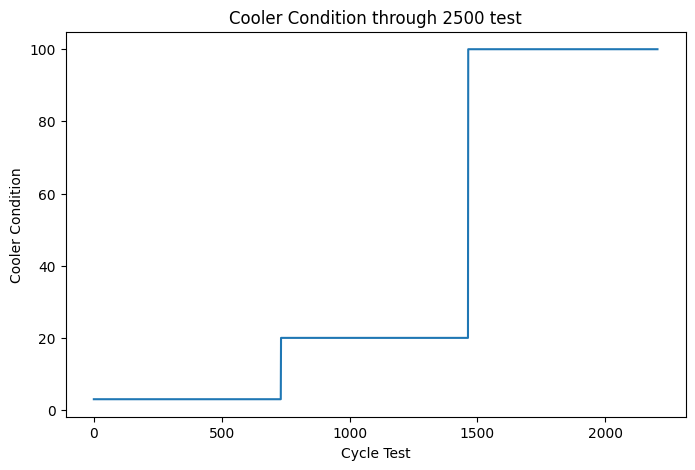

In [13]:
plt.figure(figsize=(8,5))
sns.lineplot(data=target_1)
plt.title("Cooler Condition through 2500 test")
plt.xlabel("Cycle Test")
plt.ylabel("Cooler Condition")
plt.show()

In [14]:
y = target_1.copy()
# Label target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardize, y_encoded, test_size=0.2, random_state=42)

In [15]:
# Perform cross-validation for each model
cv_results = cross_validate_for_each_model(models, X_train, y_train)

Performing cross-validation for LogisticRegression...
Performing cross-validation for RandomForest...
Performing cross-validation for GradientBoosting...
Performing cross-validation for DecisionTree...
Performing cross-validation for XGBoost...
LogisticRegression:
  Mean train score: 0.9977
  Mean test score: 0.9977
  Standard deviation of test score: 0.0038
  Mean fit time: 0.0047 seconds
  Mean score time: 0.0000 seconds
RandomForest:
  Mean train score: 1.0000
  Mean test score: 0.9983
  Standard deviation of test score: 0.0036
  Mean fit time: 0.1522 seconds
  Mean score time: 0.0048 seconds
GradientBoosting:
  Mean train score: 1.0000
  Mean test score: 0.9989
  Standard deviation of test score: 0.0034
  Mean fit time: 1.5961 seconds
  Mean score time: 0.0012 seconds
DecisionTree:
  Mean train score: 1.0000
  Mean test score: 0.9989
  Standard deviation of test score: 0.0034
  Mean fit time: 0.0046 seconds
  Mean score time: 0.0002 seconds
XGBoost:
  Mean train score: 1.0000
  Mea

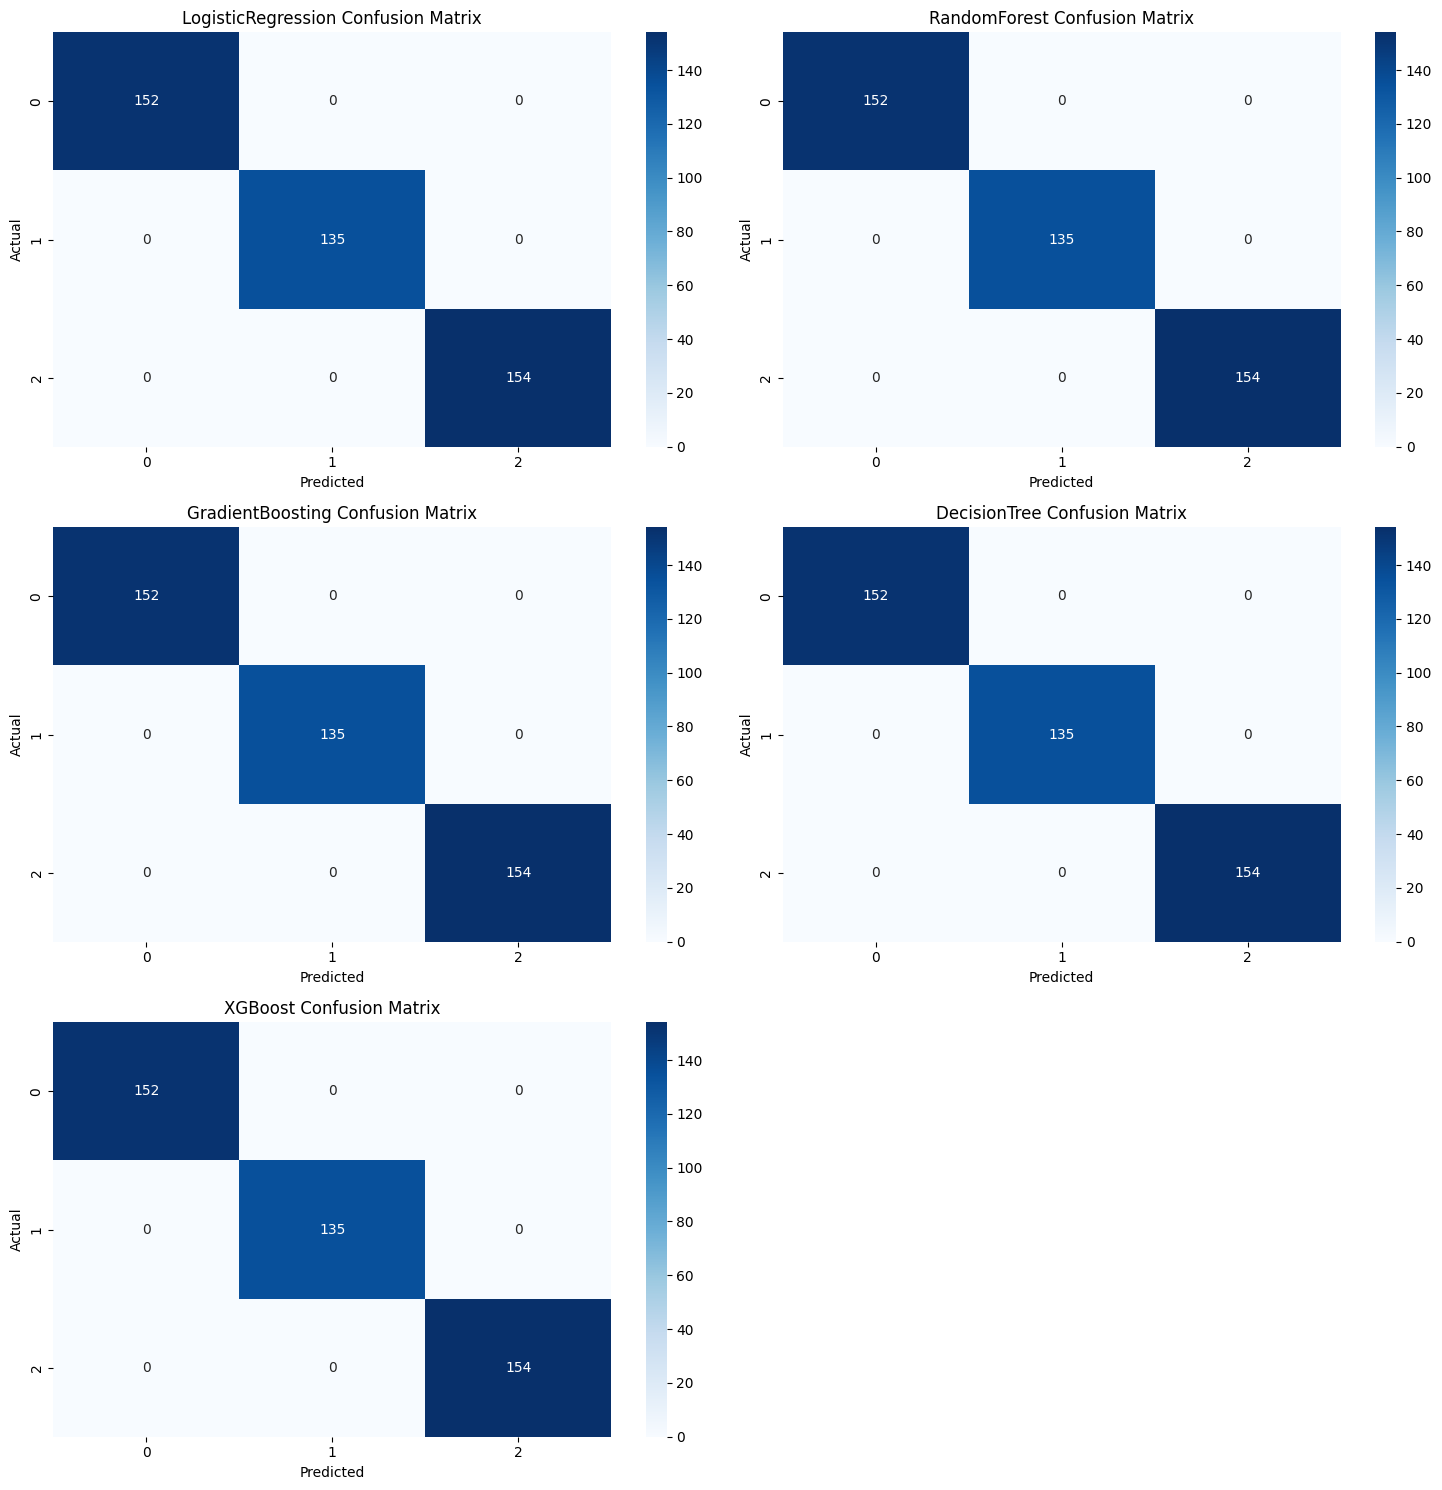

In [16]:
# Plotting the confusion matrix for each model
plot_confusion_matrix(models, X_train, y_train, X_test, y_test)

Best model for Cooler Condition: DecisionTree
Best parameters for DecisionTree: DecisionTreeClassifier(max_depth=np.int64(22), max_features='sqrt',
                       min_samples_leaf=np.int64(1),
                       min_samples_split=np.int64(8), random_state=42)
Best cross-validation score for DecisionTree: 0.9988668555240793
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       135
           2       1.00      1.00      1.00       154

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441

Accuracy Score: 1.0


Text(45.722222222222214, 0.5, 'Actual')

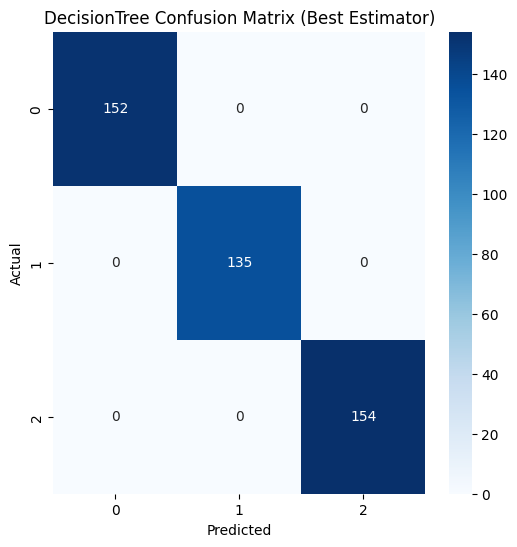

In [17]:
# Choosing the best model
best_model_name = best_model_selection(cv_results, 0.6, 0.2, 0.2)
best_model_target_1 = models[best_model_name]
print(f"Best model for Cooler Condition: {best_model_name}")

# Hyperparameter
hyperparameter = best_estimator_selection(models, best_model_name, param_grids, X_train, y_train, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Check performance with the best estimator immediately after Randomized Search CV 
y_pred = hyperparameter.predict(X_test) 
cm = confusion_matrix(y_test, y_pred) 
print("Classification Report:") 
print(classification_report(y_test, y_pred)) 
print("Accuracy Score:", accuracy_score(y_test, y_pred)) 

plt.figure(figsize=(6, 6)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') 
plt.title(f'{best_model_name} Confusion Matrix (Best Estimator)') 
plt.xlabel('Predicted') 
plt.ylabel('Actual')

In [18]:
# Save ML model and its parameters
save_ML_model(hyperparameter, 'CoolerConditionDetectionML.pkl')

## Second Target: Valve Condition Multi-Classification

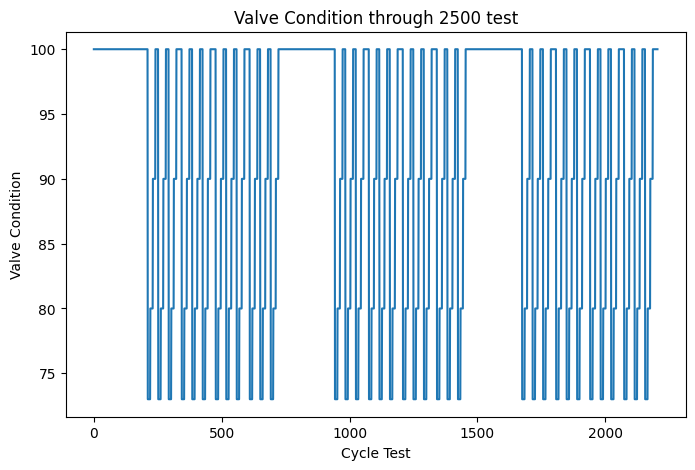

In [19]:
plt.figure(figsize=(8,5))
sns.lineplot(data=target_2)
plt.title("Valve Condition through 2500 test")
plt.xlabel("Cycle Test")
plt.ylabel("Valve Condition")
plt.show()

In [20]:
y = target_2.copy()
# Label target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardize, y_encoded, test_size=0.2, random_state=42)

In [21]:
# Perform cross-validation for each model
cv_results = cross_validate_for_each_model(models, X_train, y_train)

Performing cross-validation for LogisticRegression...
Performing cross-validation for RandomForest...
Performing cross-validation for GradientBoosting...
Performing cross-validation for DecisionTree...
Performing cross-validation for XGBoost...
LogisticRegression:
  Mean train score: 0.7443
  Mean test score: 0.7353
  Standard deviation of test score: 0.0232
  Mean fit time: 0.0255 seconds
  Mean score time: 0.0001 seconds
RandomForest:
  Mean train score: 1.0000
  Mean test score: 0.9705
  Standard deviation of test score: 0.0156
  Mean fit time: 0.3443 seconds
  Mean score time: 0.0022 seconds
GradientBoosting:
  Mean train score: 0.9989
  Mean test score: 0.9462
  Standard deviation of test score: 0.0170
  Mean fit time: 2.8881 seconds
  Mean score time: 0.0019 seconds
DecisionTree:
  Mean train score: 1.0000
  Mean test score: 0.9399
  Standard deviation of test score: 0.0253
  Mean fit time: 0.0151 seconds
  Mean score time: 0.0002 seconds
XGBoost:
  Mean train score: 1.0000
  Mea

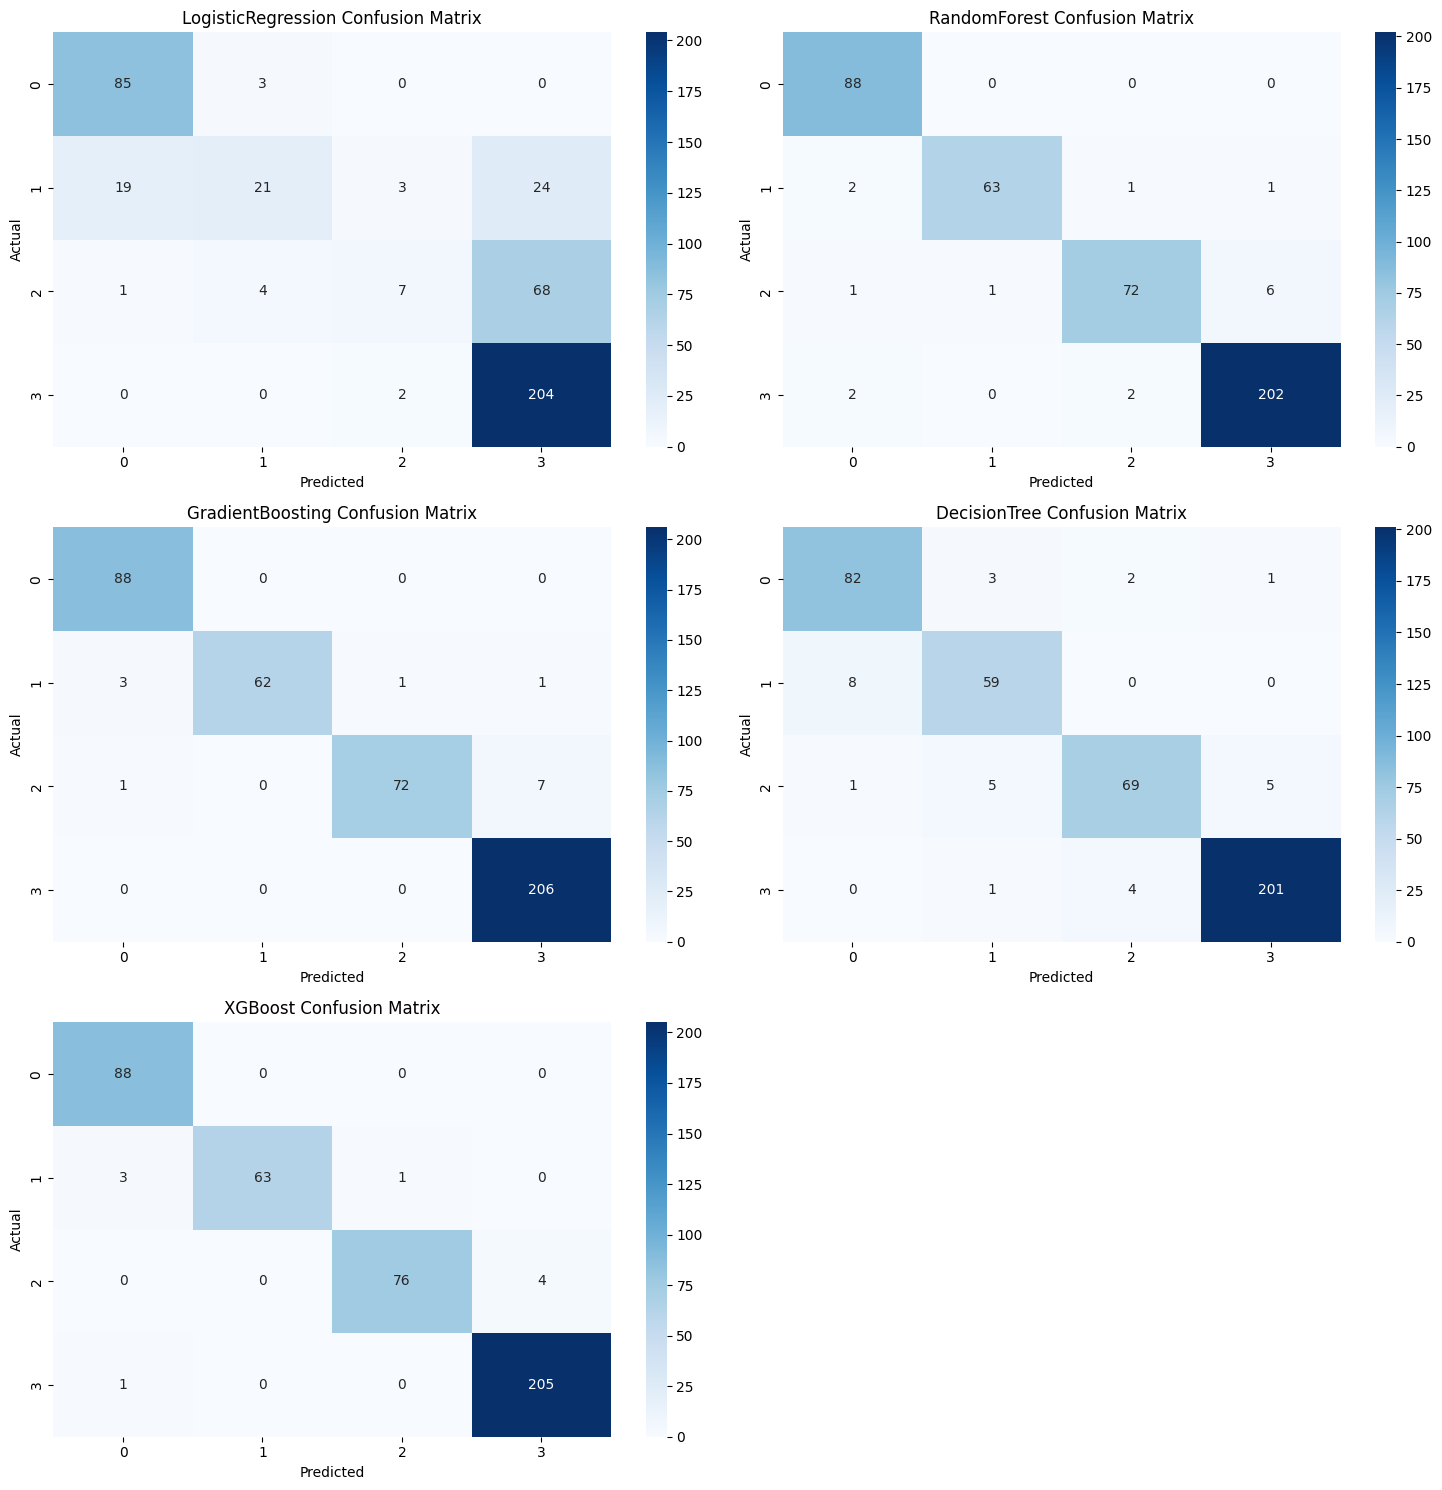

In [22]:
# Plotting the confusion matrix for each model
plot_confusion_matrix(models, X_train, y_train, X_test, y_test)

Best model for Valve Condition: DecisionTree
Best parameters for DecisionTree: DecisionTreeClassifier(max_depth=np.int64(22), max_features='log2',
                       min_samples_leaf=np.int64(1),
                       min_samples_split=np.int64(3), random_state=42)
Best cross-validation score for DecisionTree: 0.8860706927633274
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        88
           1       0.91      0.93      0.92        67
           2       0.85      0.82      0.84        80
           3       0.94      0.95      0.94       206

    accuracy                           0.92       441
   macro avg       0.91      0.90      0.90       441
weighted avg       0.92      0.92      0.92       441

Accuracy Score: 0.9160997732426304


Text(45.722222222222214, 0.5, 'Actual')

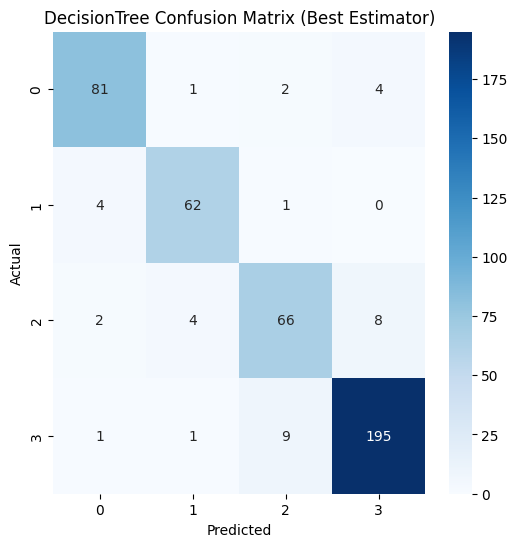

In [23]:
# Choosing the best model
best_model_name = best_model_selection(cv_results, 0.6, 0.2, 0.2)
best_model_target_2 = models[best_model_name]
print(f"Best model for Valve Condition: {best_model_name}")

# Hyperparameter
hyperparameter = best_estimator_selection(models, best_model_name, param_grids, X_train, y_train, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Check performance with the best estimator immediately after Randomized Search CV 
y_pred = hyperparameter.predict(X_test) 
cm = confusion_matrix(y_test, y_pred) 
print("Classification Report:") 
print(classification_report(y_test, y_pred)) 
print("Accuracy Score:", accuracy_score(y_test, y_pred)) 

plt.figure(figsize=(6, 6)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') 
plt.title(f'{best_model_name} Confusion Matrix (Best Estimator)') 
plt.xlabel('Predicted') 
plt.ylabel('Actual')

In [24]:
# Save ML model and its parameters
save_ML_model(hyperparameter, 'ValveConditionDetectionML.pkl')

## Third Target: Internal Pump Leakage Multi-Classification

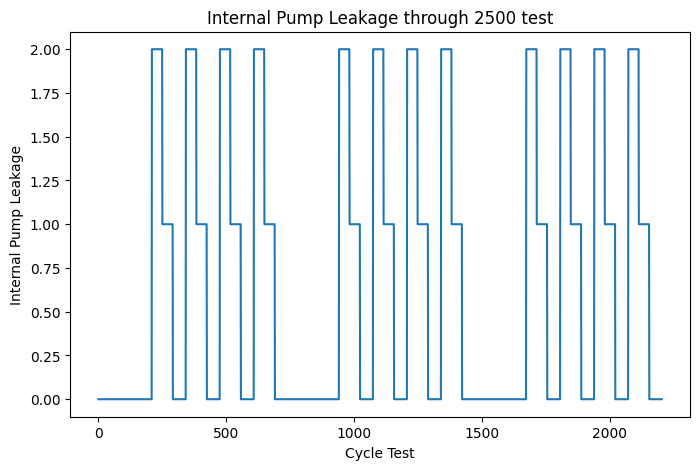

In [25]:
plt.figure(figsize=(8,5))
sns.lineplot(data=target_3)
plt.title("Internal Pump Leakage through 2500 test")
plt.xlabel("Cycle Test")
plt.ylabel("Internal Pump Leakage")
plt.show()

In [26]:
y = target_3.copy()
# Label target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardize, y_encoded, test_size=0.2, random_state=42)

In [27]:
# Perform cross-validation for each model
cv_results = cross_validate_for_each_model(models, X_train, y_train)

Performing cross-validation for LogisticRegression...
Performing cross-validation for RandomForest...
Performing cross-validation for GradientBoosting...
Performing cross-validation for DecisionTree...
Performing cross-validation for XGBoost...
LogisticRegression:
  Mean train score: 0.9857
  Mean test score: 0.9864
  Standard deviation of test score: 0.0081
  Mean fit time: 0.0143 seconds
  Mean score time: 0.0000 seconds
RandomForest:
  Mean train score: 1.0000
  Mean test score: 0.9921
  Standard deviation of test score: 0.0052
  Mean fit time: 0.2102 seconds
  Mean score time: 0.0015 seconds
GradientBoosting:
  Mean train score: 1.0000
  Mean test score: 0.9949
  Standard deviation of test score: 0.0040
  Mean fit time: 2.1060 seconds
  Mean score time: 0.0023 seconds
DecisionTree:
  Mean train score: 1.0000
  Mean test score: 0.9870
  Standard deviation of test score: 0.0084
  Mean fit time: 0.0089 seconds
  Mean score time: 0.0001 seconds
XGBoost:
  Mean train score: 1.0000
  Mea

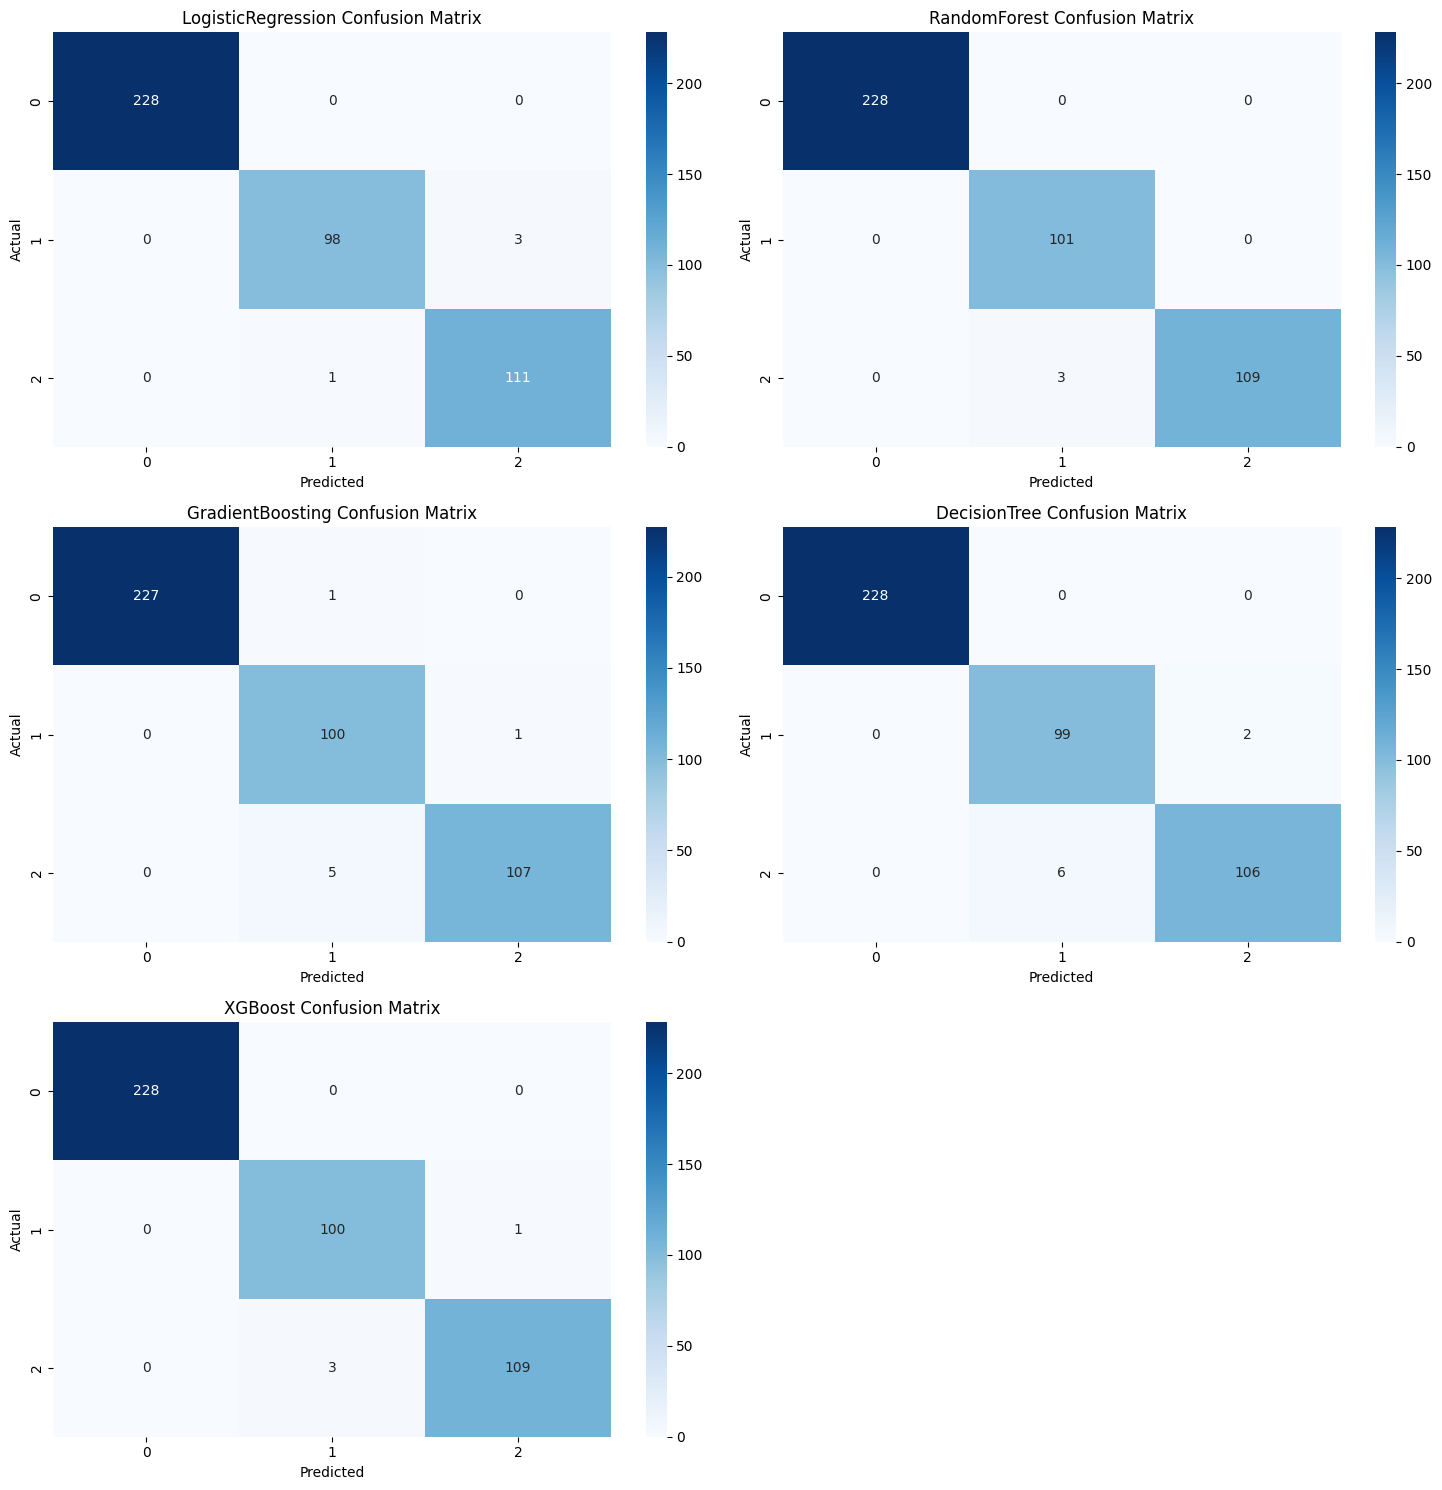

In [28]:
# Plotting the confusion matrix for each model
plot_confusion_matrix(models, X_train, y_train, X_test, y_test)

Best model for Internal Pump Leakage Detection: DecisionTree
Best parameters for DecisionTree: DecisionTreeClassifier(max_depth=np.int64(9), max_features='log2',
                       min_samples_leaf=np.int64(1),
                       min_samples_split=np.int64(8), random_state=42)
Best cross-validation score for DecisionTree: 0.9756309554468194
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       0.94      1.00      0.97       101
           2       1.00      0.94      0.97       112

    accuracy                           0.98       441
   macro avg       0.98      0.98      0.98       441
weighted avg       0.99      0.98      0.98       441

Accuracy Score: 0.9841269841269841


Text(45.722222222222214, 0.5, 'Actual')

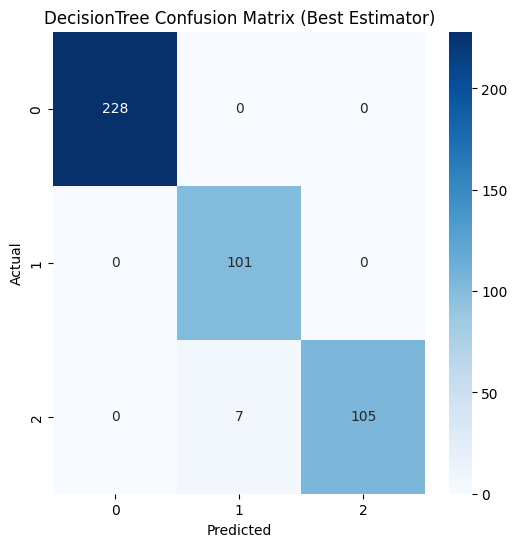

In [29]:
# Choosing the best model
best_model_name = best_model_selection(cv_results, 0.6, 0.2, 0.2)
best_model_target_3 = models[best_model_name]
print(f"Best model for Internal Pump Leakage Detection: {best_model_name}")

# Hyperparameter
hyperparameter = best_estimator_selection(models, best_model_name, param_grids, X_train, y_train, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Check performance with the best estimator immediately after Randomized Search CV 
y_pred = hyperparameter.predict(X_test) 
cm = confusion_matrix(y_test, y_pred) 
print("Classification Report:") 
print(classification_report(y_test, y_pred)) 
print("Accuracy Score:", accuracy_score(y_test, y_pred)) 

plt.figure(figsize=(6, 6)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') 
plt.title(f'{best_model_name} Confusion Matrix (Best Estimator)') 
plt.xlabel('Predicted') 
plt.ylabel('Actual')

In [30]:
# Save ML model and its parameters
save_ML_model(hyperparameter, 'InternalPumpLeakageML.pkl')

### Fourth Target: Hydraulic accumulator Detection

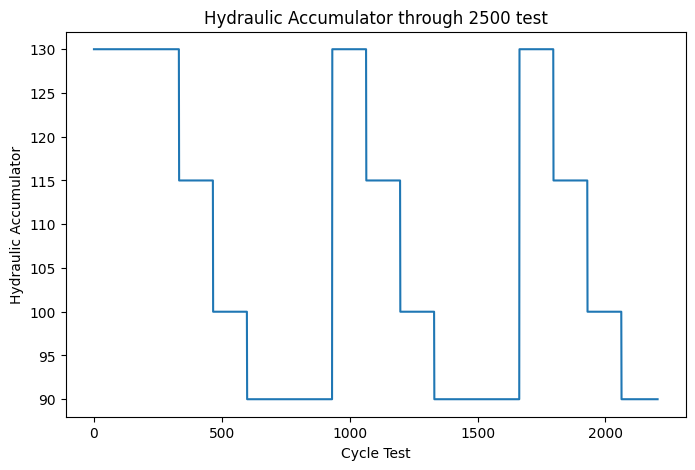

In [31]:
plt.figure(figsize=(8,5))
sns.lineplot(data=target_4)
plt.title("Hydraulic Accumulator through 2500 test")
plt.xlabel("Cycle Test")
plt.ylabel("Hydraulic Accumulator")
plt.show()

In [32]:
y = target_4.copy()
# Label target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardize, y_encoded, test_size=0.2, random_state=42)

In [33]:
# Perform cross-validation for each model
cv_results = cross_validate_for_each_model(models, X_train, y_train)

Performing cross-validation for LogisticRegression...
Performing cross-validation for RandomForest...
Performing cross-validation for GradientBoosting...
Performing cross-validation for DecisionTree...
Performing cross-validation for XGBoost...
LogisticRegression:
  Mean train score: 0.6412
  Mean test score: 0.6343
  Standard deviation of test score: 0.0300
  Mean fit time: 0.0256 seconds
  Mean score time: 0.0009 seconds
RandomForest:
  Mean train score: 1.0000
  Mean test score: 0.9756
  Standard deviation of test score: 0.0101
  Mean fit time: 0.3118 seconds
  Mean score time: 0.0039 seconds
GradientBoosting:
  Mean train score: 1.0000
  Mean test score: 0.9626
  Standard deviation of test score: 0.0028
  Mean fit time: 2.8205 seconds
  Mean score time: 0.0024 seconds
DecisionTree:
  Mean train score: 1.0000
  Mean test score: 0.9325
  Standard deviation of test score: 0.0112
  Mean fit time: 0.0156 seconds
  Mean score time: 0.0017 seconds
XGBoost:
  Mean train score: 1.0000
  Mea

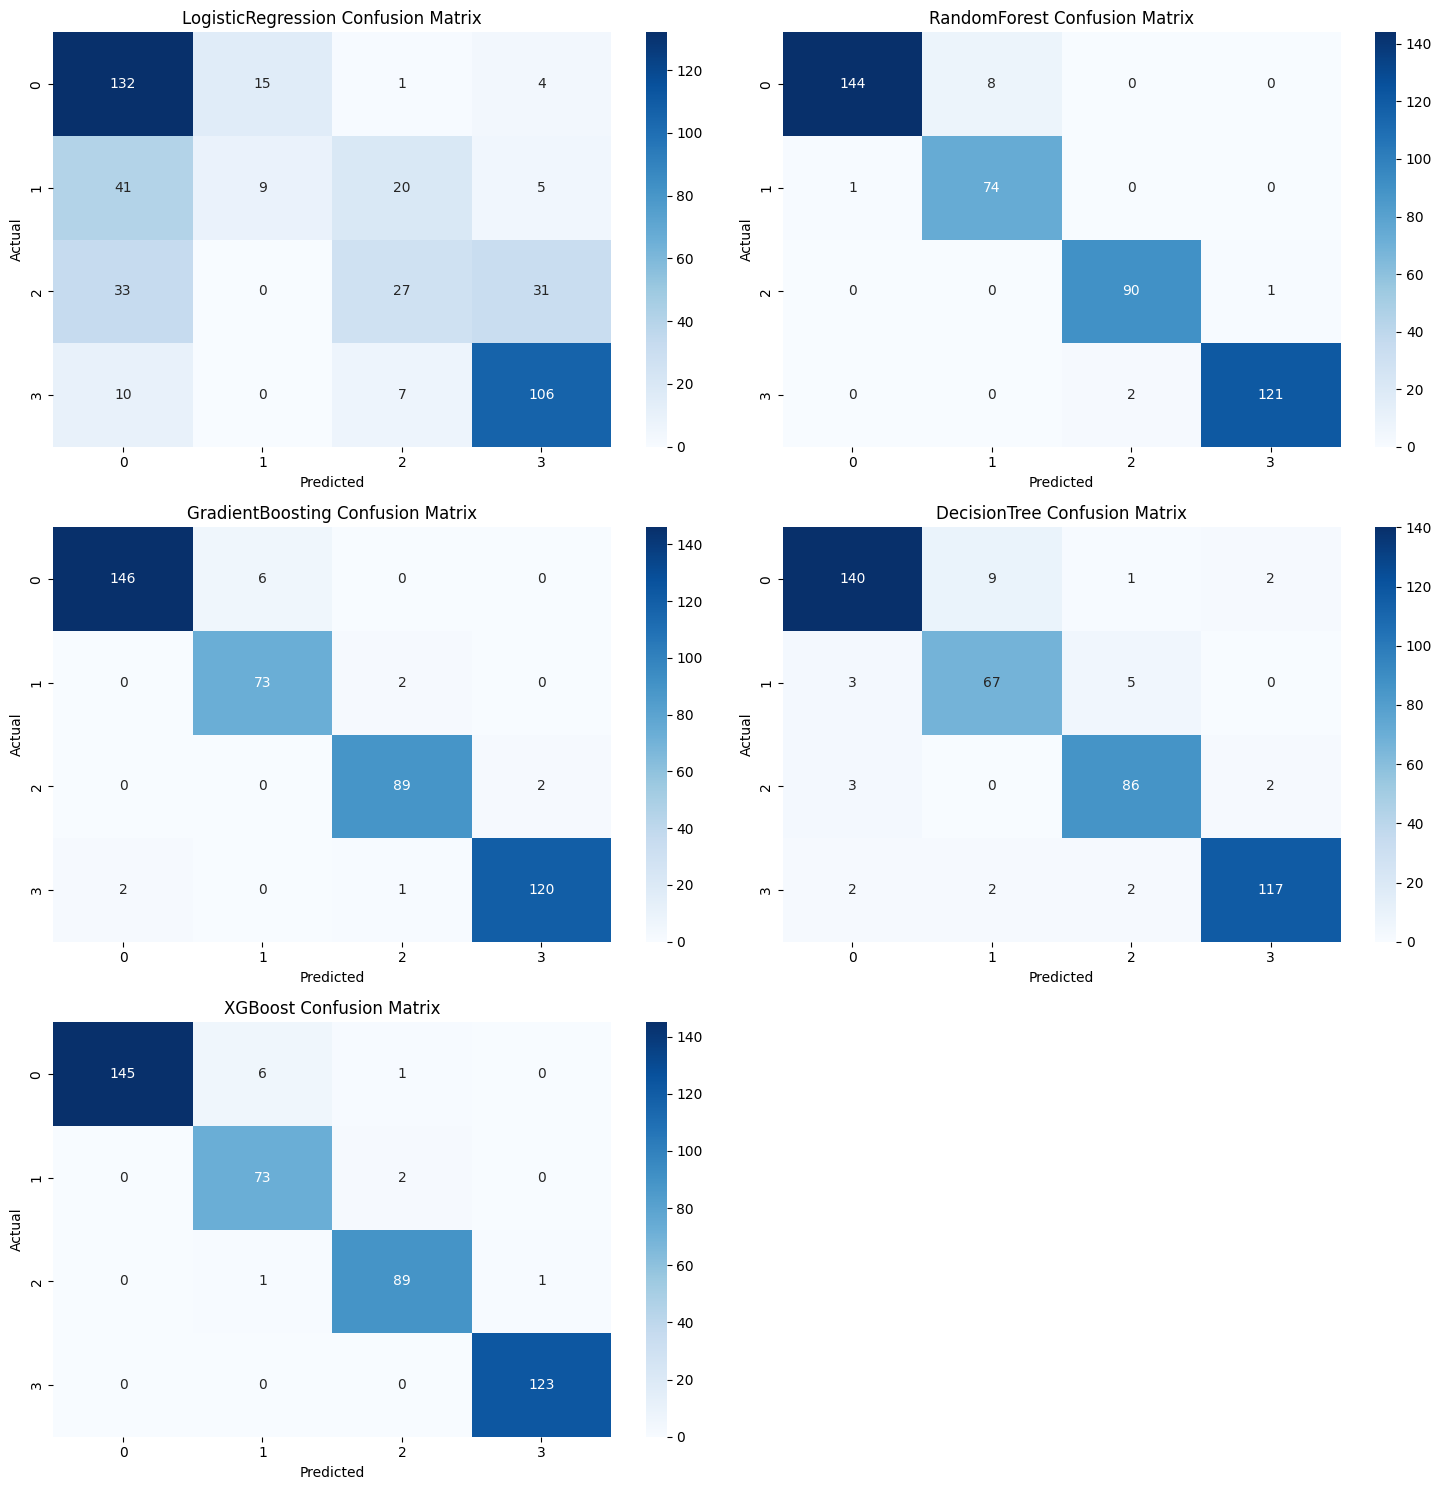

In [34]:
# Plotting the confusion matrix for each model
plot_confusion_matrix(models, X_train, y_train, X_test, y_test)

Best model for Hydraulic Accumulator Detection: DecisionTree
Best parameters for DecisionTree: DecisionTreeClassifier(max_depth=np.int64(22), max_features='sqrt',
                       min_samples_leaf=np.int64(1),
                       min_samples_split=np.int64(8), random_state=42)
Best cross-validation score for DecisionTree: 0.9268719417975791
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       152
           1       0.88      0.89      0.89        75
           2       0.90      0.95      0.92        91
           3       0.98      0.96      0.97       123

    accuracy                           0.93       441
   macro avg       0.93      0.93      0.93       441
weighted avg       0.94      0.93      0.93       441

Accuracy Score: 0.9342403628117913


Text(45.722222222222214, 0.5, 'Actual')

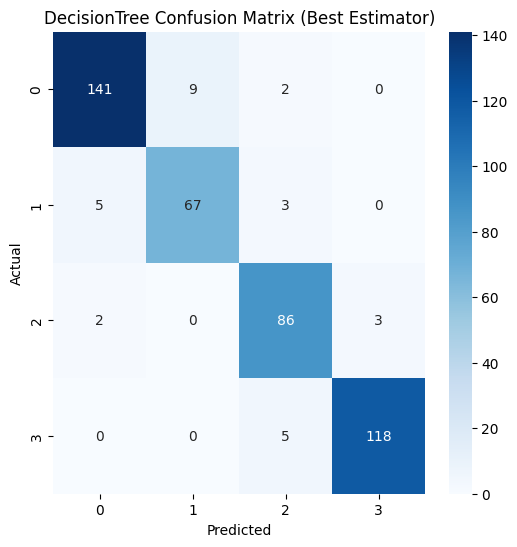

In [35]:
# Choosing the best model
best_model_name = best_model_selection(cv_results, 0.6, 0.2, 0.2)
best_model_target_4 = models[best_model_name]
print(f"Best model for Hydraulic Accumulator Detection: {best_model_name}")

# Hyperparameter
hyperparameter = best_estimator_selection(models, best_model_name, param_grids, X_train, y_train, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Check performance with the best estimator immediately after Randomized Search CV 
y_pred = hyperparameter.predict(X_test) 
cm = confusion_matrix(y_test, y_pred) 
print("Classification Report:") 
print(classification_report(y_test, y_pred)) 
print("Accuracy Score:", accuracy_score(y_test, y_pred)) 

plt.figure(figsize=(6, 6)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') 
plt.title(f'{best_model_name} Confusion Matrix (Best Estimator)') 
plt.xlabel('Predicted') 
plt.ylabel('Actual')

In [36]:
# Save ML model and its parameters
save_ML_model(hyperparameter, 'HydraulicAccumulatorDetectionML.pkl')